In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import datetime

Read the data into six separate dataframes.

In [4]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [200606, 200530, 200523, 200516, 200502, 200425]
turnstiles_df = get_data(week_nums)

In [5]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


In [6]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [7]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [8]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


Concatenate the data into one dataframe.

In [10]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
206357,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/24/2020,05:00:00,REGULAR,5554,514
206358,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/24/2020,09:00:00,REGULAR,5554,514
206359,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/24/2020,13:00:00,REGULAR,5554,514
206360,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/24/2020,17:00:00,REGULAR,5554,514
206361,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/24/2020,21:00:00,REGULAR,5554,514


In [11]:
turnstiles_df.DATE.value_counts().sort_index()

04/18/2020    29448
04/19/2020    29444
04/20/2020    29458
04/21/2020    29528
04/22/2020    29498
04/23/2020    29497
04/24/2020    29489
04/25/2020    29547
04/26/2020    29509
04/27/2020    29495
04/28/2020    29545
04/29/2020    29536
04/30/2020    29484
05/01/2020    29786
05/09/2020    29395
05/10/2020    29367
05/11/2020    29718
05/12/2020    29811
05/13/2020    29714
05/14/2020    29456
05/15/2020    29444
05/16/2020    29747
05/17/2020    29435
05/18/2020    29484
05/19/2020    29484
05/20/2020    29475
05/21/2020    29473
05/22/2020    29494
05/23/2020    29507
05/24/2020    29480
05/25/2020    30166
05/26/2020    30697
05/27/2020    30339
05/28/2020    29902
05/29/2020    30323
05/30/2020    30669
05/31/2020    29508
06/01/2020    29668
06/02/2020    29405
06/03/2020    29627
06/04/2020    29591
06/05/2020    29424
Name: DATE, dtype: int64

Exercise 1.2
Let's turn this into a time series. Create a new column that stores the date and time as a single pandas datetime object.

In [12]:
from datetime import datetime as dt

In [13]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

The DATE and TIME columns are object datatypes, which in Pandas is a string.

In [14]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


In [15]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


In [16]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
235930,J009,R378,00-00-01,MYRTLE AV,2020-05-27 05:00:00,2
0,A002,R051,02-00-00,59 ST,2020-04-18 00:00:00,1
830050,R139,R031,04-00-03,34 ST-PENN STA,2020-05-29 00:00:00,1
830049,R139,R031,04-00-03,34 ST-PENN STA,2020-05-28 20:00:00,1
830048,R139,R031,04-00-03,34 ST-PENN STA,2020-05-28 16:00:00,1


In [17]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "J009") & 
(turnstiles_df["UNIT"] == "R378") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "MYRTLE AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 5, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
40877,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,01:00:00,REGULAR,3047244,2109618,2020-05-27 01:00:00
40878,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,05:00:00,REGULAR,3047247,2109623,2020-05-27 05:00:00
40879,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,05:00:00,RECOVR AUD,3047246,2109623,2020-05-27 05:00:00
40880,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,09:00:00,REGULAR,3047363,2109697,2020-05-27 09:00:00
40881,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,13:00:00,REGULAR,3047424,2109765,2020-05-27 13:00:00


In [18]:
turnstiles_df.DESC.value_counts()

REGULAR       1240945
RECOVR AUD       4122
Name: DESC, dtype: int64

In [19]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [20]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-04-18 00:00:00,1
830049,R139,R031,04-00-03,34 ST-PENN STA,2020-05-28 20:00:00,1
830047,R139,R031,04-00-03,34 ST-PENN STA,2020-05-28 12:00:00,1
830046,R139,R031,04-00-03,34 ST-PENN STA,2020-05-28 08:00:00,1
830045,R139,R031,04-00-03,34 ST-PENN STA,2020-05-28 04:00:00,1


In [21]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [22]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [23]:
turnstiles_daily.head(50)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,04/18/2020,7414813
1,A002,R051,02-00-00,59 ST,04/19/2020,7414895
2,A002,R051,02-00-00,59 ST,04/20/2020,7415007
3,A002,R051,02-00-00,59 ST,04/21/2020,7415111
4,A002,R051,02-00-00,59 ST,04/22/2020,7415241
5,A002,R051,02-00-00,59 ST,04/23/2020,7415343
6,A002,R051,02-00-00,59 ST,04/24/2020,7415437
7,A002,R051,02-00-00,59 ST,04/25/2020,7415500
8,A002,R051,02-00-00,59 ST,04/26/2020,7415561
9,A002,R051,02-00-00,59 ST,04/27/2020,7415685


In [24]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .apply(lambda grp: grp.shift(1)))

In [25]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,04/18/2020,7414813,NaN,NaN
1,A002,R051,02-00-00,59 ST,04/19/2020,7414895,04/18/2020,7414813.0
2,A002,R051,02-00-00,59 ST,04/20/2020,7415007,04/19/2020,7414895.0
3,A002,R051,02-00-00,59 ST,04/21/2020,7415111,04/20/2020,7415007.0
4,A002,R051,02-00-00,59 ST,04/22/2020,7415241,04/21/2020,7415111.0


Remove Nan rowv for prev_date and prev_entries

In [26]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

Next, let's look at some more weirdness in the data and think about handling it before we finalize our daily count column

In [27]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1601,A011,R080,01-03-00,57 ST-7 AV,04/19/2020,885667607,04/18/2020,885667647.0
1602,A011,R080,01-03-00,57 ST-7 AV,04/20/2020,885667556,04/19/2020,885667607.0
1603,A011,R080,01-03-00,57 ST-7 AV,04/21/2020,885667489,04/20/2020,885667556.0
1604,A011,R080,01-03-00,57 ST-7 AV,04/22/2020,885667418,04/21/2020,885667489.0
1605,A011,R080,01-03-00,57 ST-7 AV,04/23/2020,885667360,04/22/2020,885667418.0


In [28]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         41
            01-03-02  57 ST-7 AV          1
A025  R023  01-03-01  34 ST-HERALD SQ    41
A049  R088  02-05-00  CORTLANDT ST        5
A050  R088  00-03-02  CORTLANDT ST        1
                                         ..
R528  R097  00-05-01  JUNCTION BLVD       1
R534  R055  01-03-02  FLUSHING-MAIN       1
R621  R060  00-05-01  EASTN PKWY-MUSM     1
R622  R123  00-00-00  FRANKLIN AV        36
R730  R431  00-00-04  EASTCHSTER/DYRE    41
Length: 98, dtype: int64

In [29]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

9 1562921334.0
6 6777428.0
107 8235039.0
36 5675074.0
25 8800439.0
230 955727806.0
20 2635368.0
95 3571824.0
15 2090862.0
83886080 655360.0
2936169 81003.0
95 2407240.0
56 1937131.0
8368580 1822369.0
1627393907 6366854.0
12 1098377.0
57 1224795434.0
30 10444603.0
30 1634879.0
458752 9259448.0
11 3366625.0
524329 120317237.0
1245523 40416.0
113 3082668.0
52 5708934.0
102 15482749.0
6118016 39944.0


In [30]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [31]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,04/19/2020,7414895,04/18/2020,7414813.0,82.0
2,A002,R051,02-00-00,59 ST,04/20/2020,7415007,04/19/2020,7414895.0,112.0
3,A002,R051,02-00-00,59 ST,04/21/2020,7415111,04/20/2020,7415007.0,104.0
4,A002,R051,02-00-00,59 ST,04/22/2020,7415241,04/21/2020,7415111.0,130.0
5,A002,R051,02-00-00,59 ST,04/23/2020,7415343,04/22/2020,7415241.0,102.0


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

/Users/albinasitdikova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAILY_ENTRIES', ylabel='Density'>

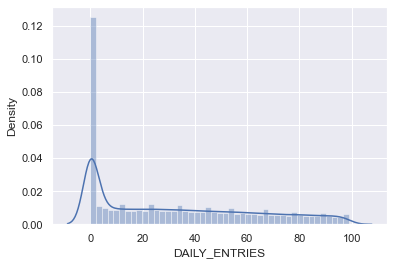

In [33]:
sns.distplot(turnstiles_daily['DAILY_ENTRIES']
             [turnstiles_daily['DAILY_ENTRIES'] < 100])

Distribution of daily entries by station, for top 10 stations by volume¶

In [34]:
# first get daily entries by station
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,04/19/2020,520.0
1,1 AV,04/20/2020,1380.0
2,1 AV,04/21/2020,1431.0
3,1 AV,04/22/2020,1631.0
4,1 AV,04/23/2020,1538.0


In [35]:
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

107       81 ST-MUSEUM
199          DEKALB AV
61      34 ST-PENN STA
68     42 ST-PORT AUTH
135    B'WAY-LAFAYETTE
0                 1 AV
353     TIMES SQ-42 ST
212          EUCLID AV
9               125 ST
173           CANAL ST
Name: STATION, dtype: object

### Challenge 6


Similarly, combine everything in each station, and come up with daily time series for each STATION, by adding up all the turnstiles in a station.

In [36]:
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,04/19/2020,520.0
1,1 AV,04/20/2020,1380.0
2,1 AV,04/21/2020,1431.0
3,1 AV,04/22/2020,1631.0
4,1 AV,04/23/2020,1538.0


For specific station

In [37]:
mask_station = (stations_daily["STATION"] == "RIT-ROOSEVELT")

In [38]:
specific_station_daily = stations_daily[mask_station]

In [39]:
specific_station_daily

,STATION,DATE,DAILY_ENTRIES
13498,RIT-ROOSEVELT,04/19/2020,499.0
13499,RIT-ROOSEVELT,04/20/2020,364.0
13500,RIT-ROOSEVELT,04/21/2020,339.0
13501,RIT-ROOSEVELT,04/22/2020,447.0
13502,RIT-ROOSEVELT,04/23/2020,396.0
13503,RIT-ROOSEVELT,04/24/2020,373.0
13504,RIT-ROOSEVELT,04/25/2020,615.0
13505,RIT-ROOSEVELT,04/26/2020,234.0
13506,RIT-ROOSEVELT,04/27/2020,363.0
13507,RIT-ROOSEVELT,04/28/2020,575.0


### Challenge 7


Plot the daily time series for a station.

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

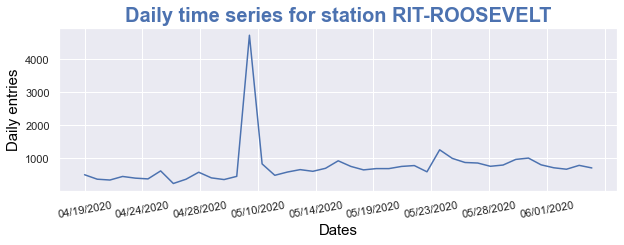

In [41]:
plt.figure(figsize=(10,3))

plt.plot(specific_station_daily.DATE, specific_station_daily['DAILY_ENTRIES'])
#plt.grid()
ticks_x = np.linspace(0, specific_station_daily.shape[0], 10)
plt.xticks(ticks_x, rotation=10)

plt.title('Daily time series for station RIT-ROOSEVELT',fontsize = 20, weight='bold',color='b')
plt.ylabel('Daily entries', fontsize = 15, color='black');
plt.xlabel('Dates', fontsize = 15, color='black');


### Challenge 8

Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. (hint: pandas datetime day of week may be useful)
plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other

In [42]:
specific_station_daily.head()

,STATION,DATE,DAILY_ENTRIES
13498,RIT-ROOSEVELT,04/19/2020,499.0
13499,RIT-ROOSEVELT,04/20/2020,364.0
13500,RIT-ROOSEVELT,04/21/2020,339.0
13501,RIT-ROOSEVELT,04/22/2020,447.0
13502,RIT-ROOSEVELT,04/23/2020,396.0


In [43]:
change_dates_form = pd.to_datetime(specific_station_daily['DATE'])

In [44]:
specific_station_daily['DAY_OF_WEEK']=change_dates_form.dt.dayofweek
specific_station_daily

<ipython-input-44-e845aaa7c3a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_station_daily['DAY_OF_WEEK']=change_dates_form.dt.dayofweek


,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK
13498,RIT-ROOSEVELT,04/19/2020,499.0,6
13499,RIT-ROOSEVELT,04/20/2020,364.0,0
13500,RIT-ROOSEVELT,04/21/2020,339.0,1
13501,RIT-ROOSEVELT,04/22/2020,447.0,2
13502,RIT-ROOSEVELT,04/23/2020,396.0,3
13503,RIT-ROOSEVELT,04/24/2020,373.0,4
13504,RIT-ROOSEVELT,04/25/2020,615.0,5
13505,RIT-ROOSEVELT,04/26/2020,234.0,6
13506,RIT-ROOSEVELT,04/27/2020,363.0,0
13507,RIT-ROOSEVELT,04/28/2020,575.0,1


In [45]:
station_day_of_week = specific_station_daily.groupby(['DAY_OF_WEEK'])['DAILY_ENTRIES'].sum()
station_day_of_week

DAY_OF_WEEK
0    3648.0
1    3760.0
2    3710.0
3    3641.0
4    3792.0
5    7812.0
6    4569.0
Name: DAILY_ENTRIES, dtype: float64

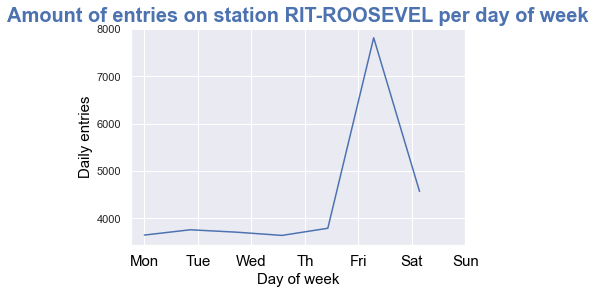

In [46]:
plt.plot(station_day_of_week)

plt.title('Amount of entries on station RIT-ROOSEVEL per day of week',fontsize = 20, weight='bold',color='b')
plt.ylabel('Daily entries', fontsize = 15, color='black')
plt.xlabel('Day of week', fontsize = 15, color='black')

ticks_x = np.linspace(0, 7, 7)
weeks=['Mon', 'Tue', 'Wed', 'Th', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks_x, weeks, fontsize = '15',color='black');

What if we don't have some data about all days a week in a row?
We should check if we have missing data in weeks and if we do, we are not gonna look at them

In [47]:
def check_weeks(list_of_weeks, entries):
    checked_list_of_week =[]
    checked_entries = []
    help_list=[]
    help_enrties=[]
    
    for i in range(0, len(list_of_weeks), 1):
        if list_of_weeks[i]==0:
            if len(help_list)==7:
                checked_list_of_week.append(help_list)
                checked_entries.append(help_enrties)
            help_list=[]
            help_enrties=[]

        help_list.append(list_of_weeks[i])
        help_enrties.append(entries[i])
        
    return checked_list_of_week, checked_entries

In [48]:
l1 = list(specific_station_daily['DAY_OF_WEEK'])

In [49]:
l2 = list(specific_station_daily['DAILY_ENTRIES'])

In [50]:
week_count_list = check_weeks(l1,l2)
week_count_list

([[0, 1, 2, 3, 4, 5, 6],
  [0, 1, 2, 3, 4, 5, 6],
  [0, 1, 2, 3, 4, 5, 6],
  [0, 1, 2, 3, 4, 5, 6],
  [0, 1, 2, 3, 4, 5, 6]],
 [[364.0, 339.0, 447.0, 396.0, 373.0, 615.0, 234.0],
  [363.0, 575.0, 404.0, 353.0, 450.0, 4725.0, 827.0],
  [482.0, 581.0, 654.0, 603.0, 694.0, 921.0, 751.0],
  [646.0, 685.0, 685.0, 751.0, 777.0, 588.0, 1254.0],
  [994.0, 870.0, 854.0, 755.0, 793.0, 963.0, 1004.0]])

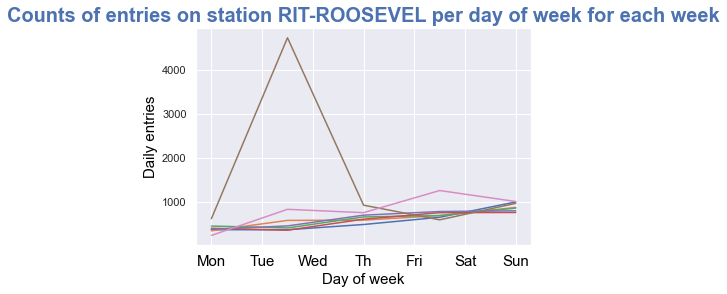

In [51]:
#l1=[0, 1, 2, 3, 4, 5, 6]
plt.plot(week_count_list[1])

plt.title('Counts of entries on station RIT-ROOSEVEL per day of week for each week',fontsize = 20, weight='bold',color='b')
plt.ylabel('Daily entries', fontsize = 15, color='black')
plt.xlabel('Day of week', fontsize = 15, color='black');

ticks_x = np.linspace(0, 4, 7)
weeks=['Mon', 'Tue', 'Wed', 'Th', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks_x, weeks, fontsize = '15',color='black');

#### Show percentage of ridership that top 5 stations make up

In [52]:
top5_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(5))

top5_stations

107       81 ST-MUSEUM
199          DEKALB AV
61      34 ST-PENN STA
68     42 ST-PORT AUTH
135    B'WAY-LAFAYETTE
Name: STATION, dtype: object

In [53]:
# next create a new df that filters the stations daily data down
# to the top 5 stations and group then by stations
percentage_of_riders_top5 = \
    (stations_daily[stations_daily['STATION']
                    .isin(top5_stations)]
     .groupby(['STATION'])[['STATION', 'DAILY_ENTRIES']]
     .sum()
     .reset_index())

Finding percentage of riders for each station

In [54]:
sum_entries_5station = percentage_of_riders_top5.DAILY_ENTRIES.sum()

In [55]:
percentage_of_riders_top5['procents']= percentage_of_riders_top5['DAILY_ENTRIES']/sum_entries_5station * 100
percentage_of_riders_top5

,STATION,DAILY_ENTRIES,procents
0,34 ST-PENN STA,1063659.0,16.641285
1,42 ST-PORT AUTH,1055106.0,16.507470
2,81 ST-MUSEUM,2151452.0,33.660154
3,B'WAY-LAFAYETTE,950337.0,14.868326
4,DEKALB AV,1171134.0,18.322765


Removing column "DAILY_ENTRIES"

In [56]:
percentage_of_riders_top5 = percentage_of_riders_top5.drop(["DAILY_ENTRIES"], axis=1, errors="ignore")
percentage_of_riders_top5

,STATION,procents
0,34 ST-PENN STA,16.641285
1,42 ST-PORT AUTH,16.507470
2,81 ST-MUSEUM,33.660154
3,B'WAY-LAFAYETTE,14.868326
4,DEKALB AV,18.322765


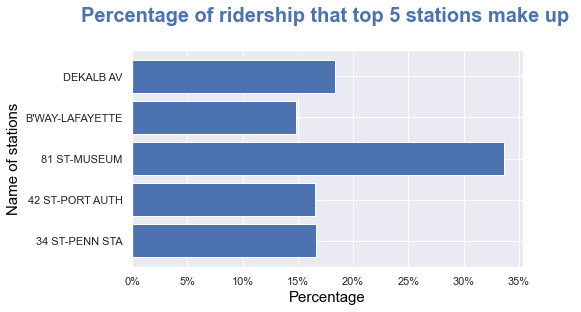

In [57]:
import matplotlib.ticker as mtick

data = percentage_of_riders_top5['STATION']
perc = percentage_of_riders_top5['procents']

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

ax.barh(data, perc)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

plt.title('Percentage of ridership that top 5 stations make up \n',fontsize = 20, weight='bold',color='b')
plt.ylabel('Name of stations', fontsize = 15, color='black');
plt.xlabel('Percentage', fontsize = 15, color='black');

plt.show();

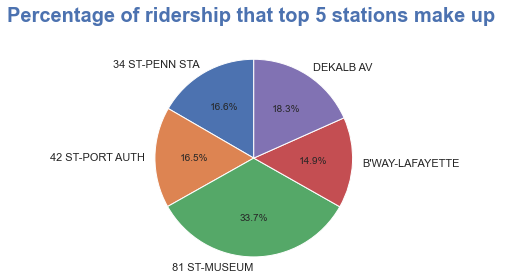

In [58]:
labels = percentage_of_riders_top5['STATION']
sizes = percentage_of_riders_top5['procents']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of ridership that top 5 stations make up \n',fontsize = 20, weight='bold',color='b')
plt.show();